# Correct Food Detection Logic
Agents move in a quasi-continuous environment, but their positions are updated in discrete steps of velocity/$\Delta t$ spatial units at each time step.
It is insufficient to only check whether the agent stepped on food each time the agent updated its position, because this leaves an unchecked area in between those positions.
<p align='center'>
    <img src="../resources/Sketch Discrete Agent Position Update.png" alt="Image" width="300">
</p>

This gets worse, when the step size increases due to
- high velocity or
- small $\Delta t$

or the eat radius is small in comparison to the step size.

**Objective**: Create a function that solves this problem by checking the whole path the agent moved at each time step, such that no food particle can be missed.

## Solution
Add a check whether there is a food particle inside the rectangle that is spanned by the two positions of the consecutive time steps and the eat radius.
<p align='center'>
    <img src="../resources/Sketch Discrete Agent Movement Check.png" alt="Image" width="300">
</p>

Test whether a point is inside a rectangle that is rotated in space by an arbitrary angle.

False


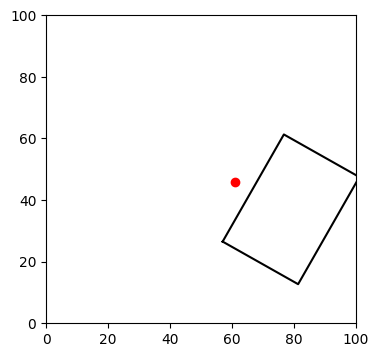

In [15]:
import math
import matplotlib.pyplot as plt
import random

SIZE = 100
MAX_DIMENSION = 20

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)
    
    def __sub__(self, other):
        return Point(self.x - other.x, self.y - other.y)
    
    def __mul__(self, other):
        return Point(self.x * other, self.y * other)
    
    def dot(self, other):
        return self.x * other.x + self.y * other.y

class Rectangle:
    def __init__(self, a, b, c, d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        
    def rotate(self):
        angle = random.uniform(0, 2 * math.pi) 
        center_x = (self.a.x + self.c.x) / 2
        center_y = (self.a.y + self.c.y) / 2
        def rotate_point(p):
            cos_theta = math.cos(angle)
            sin_theta = math.sin(angle)
            x_shifted, y_shifted = p.x - center_x, p.y - center_y
            x_rotated = x_shifted * cos_theta - y_shifted * sin_theta
            y_rotated = x_shifted * sin_theta + y_shifted * cos_theta
            return Point(center_x + x_rotated, center_y + y_rotated)
        self.a = rotate_point(self.a)
        self.b = rotate_point(self.b)
        self.c = rotate_point(self.c)
        self.d = rotate_point(self.d)

def rectangle_from_point(point):
    length = random.randint(5, MAX_DIMENSION)
    width = random.randint(5, MAX_DIMENSION)
    a = Point(point.x - length, point.y + width)
    b = Point(point.x + length, point.y + width)
    c = Point(point.x + length, point.y - width)
    d = Point(point.x - length, point.y - width)
    return Rectangle(a, b, c, d)

def get_random_point():
    x = Point(random.randint(MAX_DIMENSION, SIZE - MAX_DIMENSION), random.randint(MAX_DIMENSION, SIZE - MAX_DIMENSION))
    return x

def inside_rectangle(rectangle, point):
    v1 = rectangle.b - rectangle.a
    v2 = rectangle.d - rectangle.a
    vx = point - rectangle.a
    lambda1 = v1.dot(vx) / v1.dot(v1)
    lambda2 = v2.dot(vx) / v2.dot(v2)
    if 0 <= lambda1 <= 1 and 0 <= lambda2 <= 1:
        return True 
    else:
        return False

def render(rectangle, points):
    _, ax = plt.subplots(figsize = (4, 4))
    ax.set_xlim(0, SIZE)
    ax.set_ylim(0, SIZE)
    plt.plot([rectangle.a.x, rectangle.b.x, rectangle.c.x, rectangle.d.x, rectangle.a.x], [rectangle.a.y, rectangle.b.y, rectangle.c.y, rectangle.d.y, rectangle.a.y], color='black')
    for point in points:
        plt.plot(point.x, point.y, 'ro')

rectangle = rectangle_from_point(get_random_point())
rectangle.rotate()
point = get_random_point()
render(rectangle, [point])

print(inside_rectangle(rectangle, point))

Next develop the logic that finds the 4 rectangle corners from the positions of the agent at the consecutive time steps.

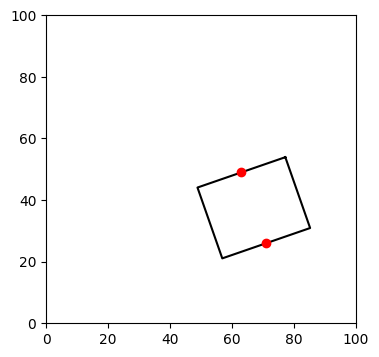

In [ ]:
point1 = get_random_point()
point2 = get_random_point()

def get_rectangle_corners(point1, point2, radius):
    vector = point2 - point1
    perpendicular = Point(-vector.y / math.sqrt(vector.dot(vector)), vector.x / math.sqrt(vector.dot(vector)))
    a = point1 + perpendicular * radius
    b = point1 - perpendicular * radius
    c = point2 - perpendicular * radius
    d = point2 + perpendicular * radius
    return Rectangle(a, b, c, d)

rectangle = get_rectangle_corners(point1, point2, random.randint(5, MAX_DIMENSION))
render(rectangle, [point1, point2])